In [19]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data

citydf = pd.read_csv(city_data_to_load)
ridedf = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ridesharedf = pd.merge(ridedf, citydf, on="city")

# Display the data table for preview
ridesharedf.head()
#len(ridesharedf) = 2375
#ridesharedf.count() : All rows have a count of 2375 


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [21]:
#citydf.head(5)
#len(citydf) = 120

In [22]:
#ridedf.head(5)
#len(ridedf) = 2375

## Bubble Plot of Ride Sharing Data

In [23]:
#help(plt.text)

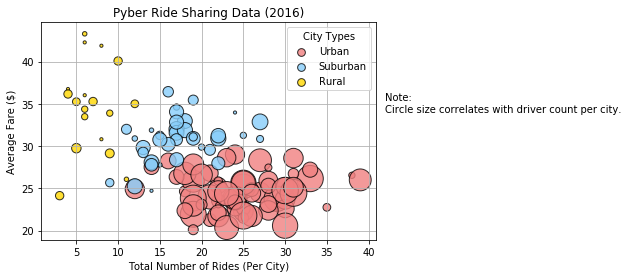

In [24]:
# Obtain the x and y coordinates for each of the three city types

#Separate into three different dataframes by city type

rideshareurban = ridesharedf.loc[ridesharedf['type'] == 'Urban', :]
ridesharesuburban = ridesharedf.loc[ridesharedf['type'] == 'Suburban', :]
ridesharerural = ridesharedf.loc[ridesharedf['type'] == 'Rural', :]

#Group by City

urbangroup = rideshareurban.groupby("city")
suburbangroup = ridesharesuburban.groupby("city")
ruralgroup = ridesharerural.groupby("city")

#Obtain rides per city

urbanrides = urbangroup["date"].count()
suburbanrides = suburbangroup["date"].count()
ruralrides = ruralgroup["date"].count()

#Obtain Average fare per city

urbanfare = urbangroup['fare'].mean()
suburbanfare = suburbangroup['fare'].mean()
ruralfare = ruralgroup['fare'].mean()

#Obtain drivers per city

urbandrivers = urbangroup["driver_count"].max()
suburbandrivers = suburbangroup["driver_count"].max()
ruraldrivers = ruralgroup["driver_count"].max()


# Build the scatter plots for each city types

urban = plt.scatter(urbanrides, urbanfare, facecolors = 'lightcoral', edgecolors = 'black', 
                     s = urbandrivers*10, alpha=0.80, linewidth = 1, label = "Urban")
suburban = plt.scatter(suburbanrides, suburbanfare, facecolors = 'lightskyblue', edgecolors = 'black',
                              s = suburbandrivers*10, alpha=0.80, label = "Suburban")
rural = plt.scatter(ruralrides, ruralfare, facecolors = 'gold', edgecolors = 'black',
                           s = ruraldrivers*10, alpha=0.80, label = "Rural")

# Incorporate the other graph properties

plt.grid()
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.text(42, 34, "Note:\nCircle size correlates with driver count per city.")
lgnd = plt.legend(handles = [urban, suburban, rural], markerscale = 1, title = "City Types")

lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

plt.savefig("pyberridesharingdata.png", dpi = 'figure', bbox_inches = 'tight')


plt.show()

# Save Figure




## Total Fares by City Type

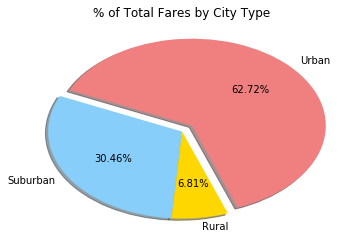

In [26]:
# Calculate Type Percents

urbantotalfare = rideshareurban["fare"].sum()
suburbantotalfare = ridesharesuburban["fare"].sum()
ruraltotalfare = ridesharerural["fare"].sum()

# Build Pie Chart

labels = ['Urban', 'Suburban', 'Rural']
farevalues = [urbantotalfare, suburbantotalfare, ruraltotalfare]
colors = ['lightcoral', 'lightskyblue', 'gold']

explode = (0.1, 0, 0)

plt.pie(farevalues, explode = explode, labels = labels, colors = colors, autopct = '%1.2f%%', shadow = True, startangle = 290)

plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("citytypefarepie.png")

plt.show()


## Total Rides by City Type

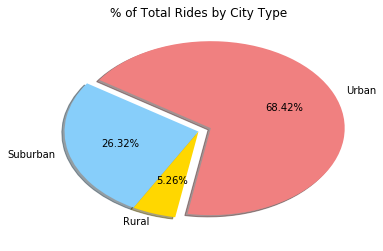

In [28]:
# Calculate Ride Percents

urbantotalrides = rideshareurban["fare"].count()
suburbantotalrides = ridesharesuburban["fare"].count()
ruraltotalrides = ridesharerural["fare"].count()

# Build Pie Chart

#labels = ['Urban', 'Suburban', 'Rural']
ridesvalues = [urbantotalrides, suburbantotalrides, ruraltotalrides]
#colors = ['lightcoral', 'lightskyblue', 'gold']

explode = (0.1, 0, 0)

plt.pie(ridesvalues, explode = explode, labels = labels, colors = colors, autopct = '%1.2f%%', shadow = True, startangle = 260)

plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("citytyperidespie.png")

plt.show()

## Total Drivers by City Type

In [32]:
#urbangroup.count().head()

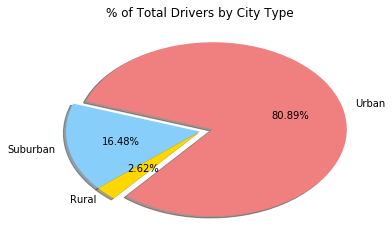

In [33]:
# Calculate Driver Percents

#Call on previously made groups by cities

# drivercount = []
# for x in list:
#     drivercountappend
    

urbantotaldrivers = (urbangroup["driver_count"].sum() / urbangroup['driver_count'].count()).sum()
suburbantotaldrivers = (suburbangroup["driver_count"].sum() / suburbangroup['driver_count'].count()).sum()
ruraltotaldrivers = (ruralgroup["driver_count"].sum() /ruralgroup['driver_count'].count()).sum()

# Build Pie Chart

#labels = ['Urban', 'Suburban', 'Rural']
driversvalues = [urbantotaldrivers, suburbantotaldrivers, ruraltotaldrivers]
#colors = ['lightcoral', 'lightskyblue', 'gold']

explode = (0.1, 0, 0)

plt.pie(driversvalues, explode = explode, labels = labels, colors = colors, autopct = '%1.2f%%', shadow = True, startangle = 230)

plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("citytypedriverspie.png")

plt.show()
